# Stochastic Gradient Descent

In [1]:
import numpy as np

In [2]:
np.random.seed(42)
X = 2*np.random.rand(100,1)
y = 4+3*X + np.random.randn(100,1)

In [3]:
#bias an error that occurs when certain elements of a dataset are overweighted or overrepresented.
#Over here bias term (intercept) helps improve the accuracy of our model.Also improves dependability
#Good to use in supervised rather than unsupervised
X_b = np.c_[np.ones((100,1)),X] #np.c_ is used for column by column addition , np.r_ is used for row by row addition
theta = np.random.randn(2,1)
#theta is used during training to make our model fit the data better.It is a model's parameter.
#Hyperparameters are parameters whose values control the learning process and determine the values of model 
#parameters that a learning algorithm ends up learning
learning_rate = 0.1
#it controls the size of steps we take to adjust the parameters
n_iterations = 100
#This is the epoch : the number of times we go through the entire dataset.

In [4]:
#Gradient Descent 
for iteration in range(n_iterations):
    gradients = 2*X_b.T.dot(y-X_b.dot(theta))
    theta -= learning_rate * gradients

#Optimal parameters

intercept, slope = theta
print("Intercept:",intercept[0])
print("Slope:", slope[0])

Intercept: -1.075247627580173e+163
Slope: -1.2177959464073296e+163


In [5]:
# Adadelta : it introduces a decay term for the accumulated historical gradients
# RMSProp (Root mean Square Propogation) : it adapts the learning rate based on the historical sum of squared gradient

In [6]:
import matplotlib.pyplot as plt

In [10]:
np.random.seed(42)
X = np.random.rand(100,1)*10
y = 2*X+3+np.random.rand(100,1)

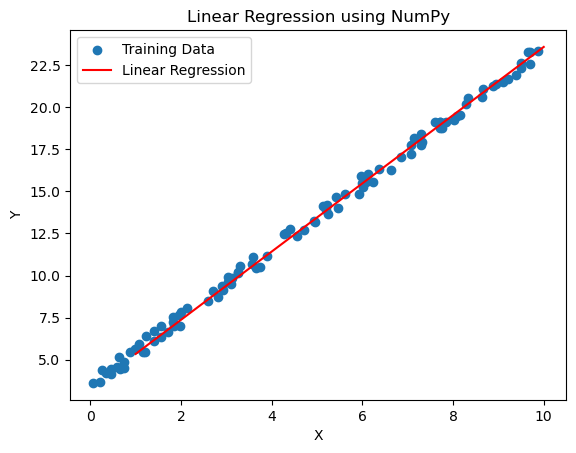

In [13]:
class LinearRegression:
    def __in__(self):
        self.weights = None
        self.bias = None
    def fit(self,X,y,learning_rate=0.01,epochs=100):
        num_samples, num_features = X.shape
        self.weights = np.zeros((num_features,1))
        self.bias = 0
        
        for _ in range(epochs):
            y_pred = np.dot(X,self.weights)+self.bias
            dw = (1/num_samples)*np.dot(X.T,(y_pred - y))
            db = (1/num_samples)*np.sum(y_pred - y)
            
            self.weights -= learning_rate *dw
            self.bias -= learning_rate*db
    def predict(self, X):
        return np.dot(X,self.weights) + self.bias
    
model = LinearRegression()
model.fit(X,y,learning_rate=0.01,epochs=1000)
X_test = np.array([[1],[5],[10]])
y_pred = model.predict(X_test)
    
plt.scatter(X,y,label='Training Data')
plt.plot(X_test,y_pred,color='red',label='Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression using NumPy')
plt.legend()
plt.show()